In [1]:
from constants import *
import matplotlib.pyplot as plt
import scipy.optimize as op
from numba import jit

In [15]:
@jit(nopython=True)
def alpha(T):
    return 9.78*r0**2*c*np.sqrt(B/T)*np.log(B/T)
@jit(nopython=True)
def ab(T):
    return (m*T/(2*pi*hbar**2))**1.5*np.exp(-B/T)
@jit(nopython=True) 
def n_g(T):
    return (T/hc)**3*16*pi*z3
@jit(nopython=True)
def Xbyt(X, T):
    return alpha(T)*(ab(T)*(1-X)-eta*n_g(T)*X*X)

In [16]:
T = np.linspace(1e3, 3e3, 500)*kb
X = np.linspace(0, 1, 200)
x,y = np.meshgrid(X, T)
z = Xbyt(x, y)

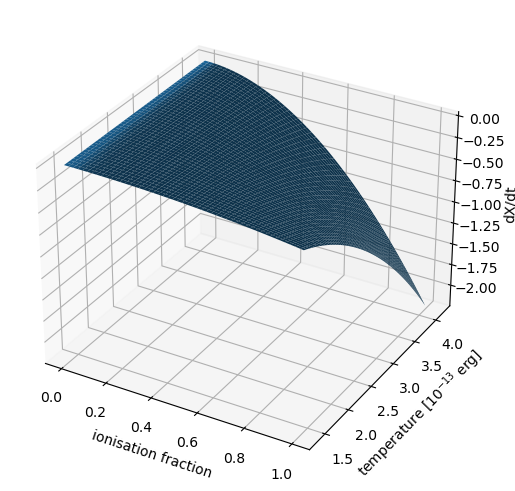

In [17]:
fig = plt.figure(constrained_layout=True)
ax = plt.axes(projection='3d')
ax.plot_surface(x,y,z)
ax.set_xlabel('ionisation fraction')
ax.set_ylabel('temperature [$10^{-13}$ erg]')
ax.set_zlabel('dX/dt')
ax.grid()
plt.savefig('Images/dx_by_dt.png', dpi=300)
plt.show()